# Load the dataframe

In [71]:
import pandas as pd
import matplotlib as pt
import numpy as np

In [14]:
df = pd.read_csv("data_small/TG_STAID000001.txt", skiprows = 20, parse_dates=["    DATE"])

In [15]:
print(df)

       STAID   SOUID       DATE     TG   Q_TG
0          1   35381 1860-01-01     21      0
1          1   35381 1860-01-02     46      0
2          1   35381 1860-01-03     31      0
3          1   35381 1860-01-04     37      0
4          1   35381 1860-01-05     31      0
...      ...     ...        ...    ...    ...
59316      1   35381 2022-05-27  -9999      9
59317      1   35381 2022-05-28  -9999      9
59318      1   35381 2022-05-29  -9999      9
59319      1   35381 2022-05-30  -9999      9
59320      1   35381 2022-05-31  -9999      9

[59321 rows x 5 columns]


# Show certain rows

In [16]:
df[10:20]

,STAID,SOUID,DATE,TG,Q_TG
10,1,35381,1860-01-11,-5,0
11,1,35381,1860-01-12,-18,0
12,1,35381,1860-01-13,-27,0
13,1,35381,1860-01-14,-26,0
14,1,35381,1860-01-15,-37,0
15,1,35381,1860-01-16,-9,0
16,1,35381,1860-01-17,7,0
17,1,35381,1860-01-18,-6,0
18,1,35381,1860-01-19,-16,0
19,1,35381,1860-01-20,-19,0


# Show certain Columns

In [21]:
df.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [22]:
df['   TG']

0          21
1          46
2          31
3          37
4          31
         ... 
59316   -9999
59317   -9999
59318   -9999
59319   -9999
59320   -9999
Name:    TG, Length: 59321, dtype: int64

In [23]:
df[['    DATE','   TG']]

,DATE,TG
0,1860-01-01,21
1,1860-01-02,46
2,1860-01-03,31
3,1860-01-04,37
4,1860-01-05,31
...,...,...
59316,2022-05-27,-9999
59317,2022-05-28,-9999
59318,2022-05-29,-9999
59319,2022-05-30,-9999


# Simple Statistics and filtering

In [31]:
df.loc[df['   TG']!= -9999]['   TG'].mean() / 10

6.360787526128467

In [33]:
df.loc[df['   TG']!= -9999]['   TG'].max() / 10

26.2

In [36]:
df.loc[df['   TG']!= -9999]['   TG'].min()/10

-28.8

In [53]:
df.loc[df['   TG']!= -9999]

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
53655,1,35381,2006-11-26,80,0
53656,1,35381,2006-11-27,70,0
53657,1,35381,2006-11-28,71,0
53658,1,35381,2006-11-29,63,0


In [47]:
df.loc[df['    DATE'] == "1860-01-05"]['   TG'].squeeze()/10

3.1

In [50]:
df.loc[df['   TG'] == df['   TG'].max()]['    DATE'].squeeze()

Timestamp('1868-08-16 00:00:00')

In [51]:
df.loc[3, '   TG']

37

# Calculate a new column out of existing column

In [75]:
df['TG0'] = df['   TG'].mask(df['   TG'] == -9999, np.nan)

In [78]:
df["TG"] = df['TG0']/10

In [80]:
df

,STAID,SOUID,DATE,TG,Q_TG,TG,Fahrenhit,TG0
0,1,35381,1860-01-01,21,0,2.1,35.78,21.0
1,1,35381,1860-01-02,46,0,4.6,40.28,46.0
2,1,35381,1860-01-03,31,0,3.1,37.58,31.0
3,1,35381,1860-01-04,37,0,3.7,38.66,37.0
4,1,35381,1860-01-05,31,0,3.1,37.58,31.0
...,...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN,-1767.82,NaN
59317,1,35381,2022-05-28,-9999,9,NaN,-1767.82,NaN
59318,1,35381,2022-05-29,-9999,9,NaN,-1767.82,NaN
59319,1,35381,2022-05-30,-9999,9,NaN,-1767.82,NaN


In [81]:
df['Fahrenhit'] = df['TG'] * (9/5) + 32

In [82]:
df

,STAID,SOUID,DATE,TG,Q_TG,TG,Fahrenhit,TG0
0,1,35381,1860-01-01,21,0,2.1,35.78,21.0
1,1,35381,1860-01-02,46,0,4.6,40.28,46.0
2,1,35381,1860-01-03,31,0,3.1,37.58,31.0
3,1,35381,1860-01-04,37,0,3.7,38.66,37.0
4,1,35381,1860-01-05,31,0,3.1,37.58,31.0
...,...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN,NaN,NaN
59317,1,35381,2022-05-28,-9999,9,NaN,NaN,NaN
59318,1,35381,2022-05-29,-9999,9,NaN,NaN,NaN
59319,1,35381,2022-05-30,-9999,9,NaN,NaN,NaN


# Plotting

<Axes: >

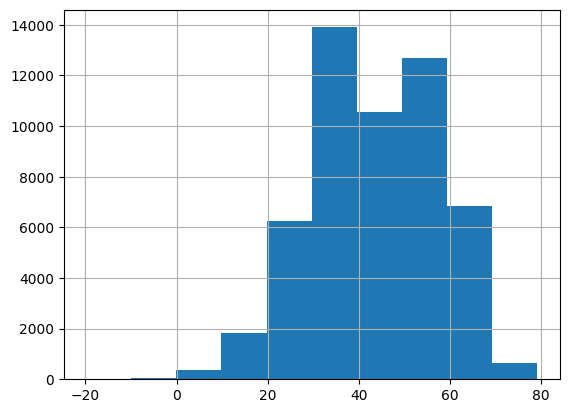

In [84]:
df['Fahrenhit'].hist()

<Axes: xlabel='    DATE'>

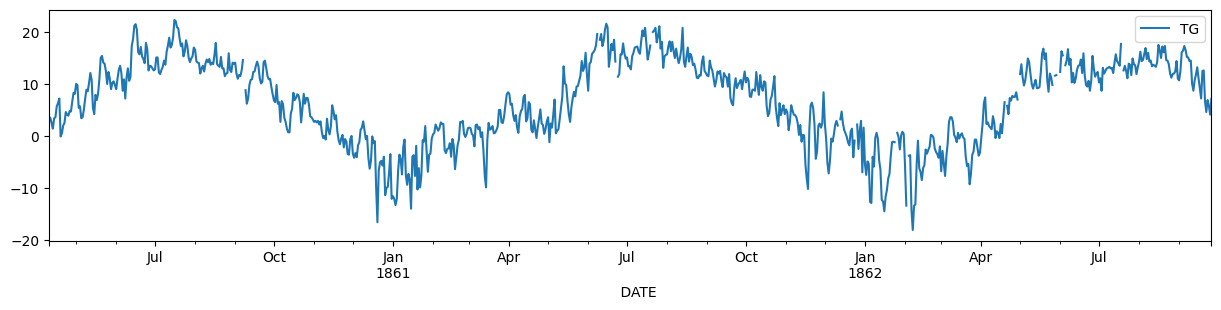

In [87]:
df[100:1000].plot(x='    DATE', y='TG', figsize=(15, 3))